In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier



In [27]:
data = pd.read_csv("equipment_failure_data_1.csv", header=0)

In [28]:
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [52]:
sensors = ['S15','S17','S13', 'S5', 'S16', 'S19', 'S18', 'S8']
X = data[sensors]
y = data[['EQUIPMENT_FAILURE']]
print(y.value_counts())
y = y['EQUIPMENT_FAILURE'].ravel()

EQUIPMENT_FAILURE
0                    149650
1                       205
dtype: int64


In [59]:
# SPLIT 60% training, 20% validation, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
X_test,  X_val,  y_test,  y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
data_y.value_counts()
print("\n X_train: ", X_train.shape)
print("\n X_test: ", X_test.shape)
print("\n X_val: ", X_val.shape)


 X_train:  (119884, 8)

 X_test:  (14985, 8)

 X_val:  (14986, 8)


In [55]:
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, y_train)
y_pred_rf_val = rf.predict(X_val)

In [75]:
#from activation_fns import sigmoid
#from evaluation import threshold_predictions
import matplotlib.pyplot as plt
import numpy as np
import itertools

def confusion_matrix(y_true, y_pred):
    # YOUR CODE HERE
    TP = FP = TN = FN = 0
    for i in range(y_true.shape[0]):
        if (y_true[i] == y_pred[i]):
            if (y_true[i]== True):
                TP = TP+1
            else:
                TN = TN+1
        else:
            if (y_true[i]==True):
                FN = FN+1
            else:
                FP = FP+1
    cm = np.zeros((2,2))   # calculate
    print("true positive:",TP, "false positive:" , FP,"True negative: ", TN, "false negative:",FN)

    # YOUR CODE HERE
    cm= np.array([[TN,FP],[FN,TP]])
    assert cm.shape == (2,2)
    return cm

def plot_confusion_matrix(cm, classes=['False', 'True'], normalize=False, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)    
    fmt = '.2f' if normalize else 'd'
    thresh = np.sum(cm) / 4.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14960
           1       0.00      0.00      0.00        26

    accuracy                           1.00     14986
   macro avg       0.50      0.50      0.50     14986
weighted avg       1.00      1.00      1.00     14986

true positive: 0 false positive: 21 True negative:  14964 false negative: 0
the confusion matrix NN: 
 [[14964    21]
 [    0     0]]
true positive: 0 false positive: 0 True negative:  14964 false negative: 21
[[14964     0]
 [   21     0]]


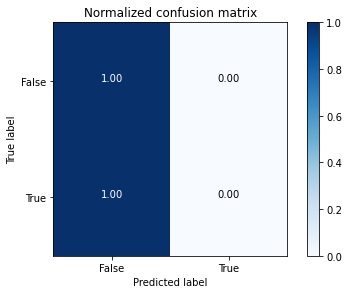

In [82]:
## validating set
print("\n",classification_report(y_val,y_pred_rf_val))
y_pred_rf = rf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred_rf)

print("the confusion matrix NN: \n", confusion_matrix(y_pred_rf, y_test))
#print("\n",classification_report(y_test,y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
plot_confusion_matrix(cm, normalize=True)
plt.show()

In [84]:
tpr = 0.       # calculate
fpr = 0.       # calculate
accuracy = 0.  # calculate


# YOUR CODE HERE
TN= cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]
print(TN,FN,FP,TP)
tpr = TP/(FN+TP)       # calculate
fpr = FP/(FP+TN)       # calculate
accuracy = ((TP + TN) / (TP + FP + TN + FN))

print('TPR/Sensitivity: ', tpr)
print('FPR/Fall-out: ', fpr)
print('Accuracy: ', accuracy)
print("F1 score: " , f1_score(y_test, y_pred_rf, average='weighted'))

14964 21 0 0
TPR/Sensitivity:  0.0
FPR/Fall-out:  0.0
Accuracy:  0.9985985985985986
F1 score:  0.9978983892236423
